Syifa Wanda Isnaini
1103201248
Machine Learning UTS

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier for the model
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation
from sklearn.preprocessing import LabelEncoder  # To encode non-numeric data
from sklearn.cluster import KMeans  # Importing KMeans
from yellowbrick.cluster import KElbowVisualizer
from google.colab import drive  # For mounting Google Drive

In [ ]:
# Mounting Google Drive to access the dataset
drive.mount('/content/drive')
# Loading the dataset into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/College.csv')

Mounted at /content/drive


In [ ]:
# Exploratory Data Analysis (EDA)
# Displaying the first few rows of the dataset
df.head()
# Providing information about the dataset such as columns, data types, and non-null values
df.info()
# Statistical summary of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


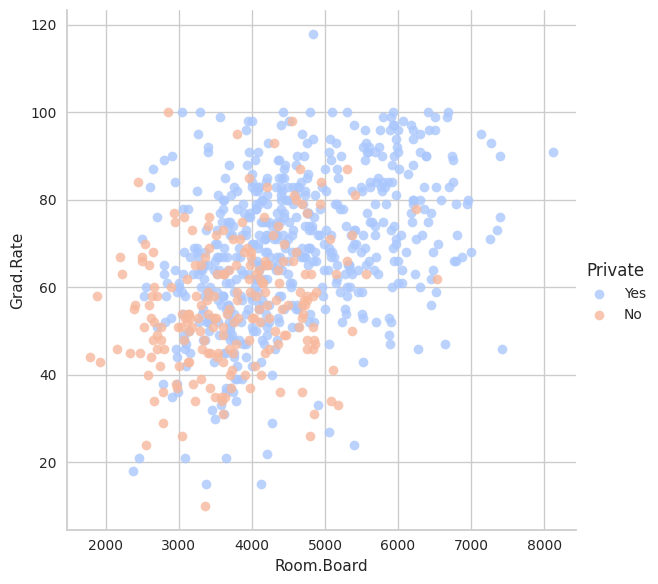

In [ ]:
# Data Visualization
# Scatter plot to visualize 'Room.Board' against 'Grad.Rate' with differentiation by 'Private'
sns.set_style('whitegrid')
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private',
           palette='coolwarm', height=6, aspect=1, fit_reg=False)

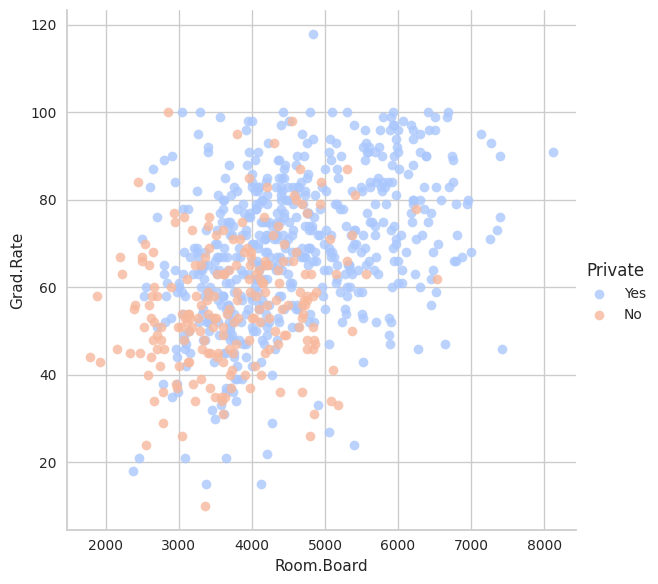

In [ ]:
sns.set_style('whitegrid')  # Setting the visual style for the plot

# Creating a scatter plot using lmplot to visualize 'Room.Board' against 'Grad.Rate'
# Data is differentiated by the 'Private' column using a coolwarm color palette
# The plot is set to a height of 6, with an aspect ratio of 1, and without a regression line (fit_reg=False)
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private',
           palette='coolwarm', height=6, aspect=1, fit_reg=False)

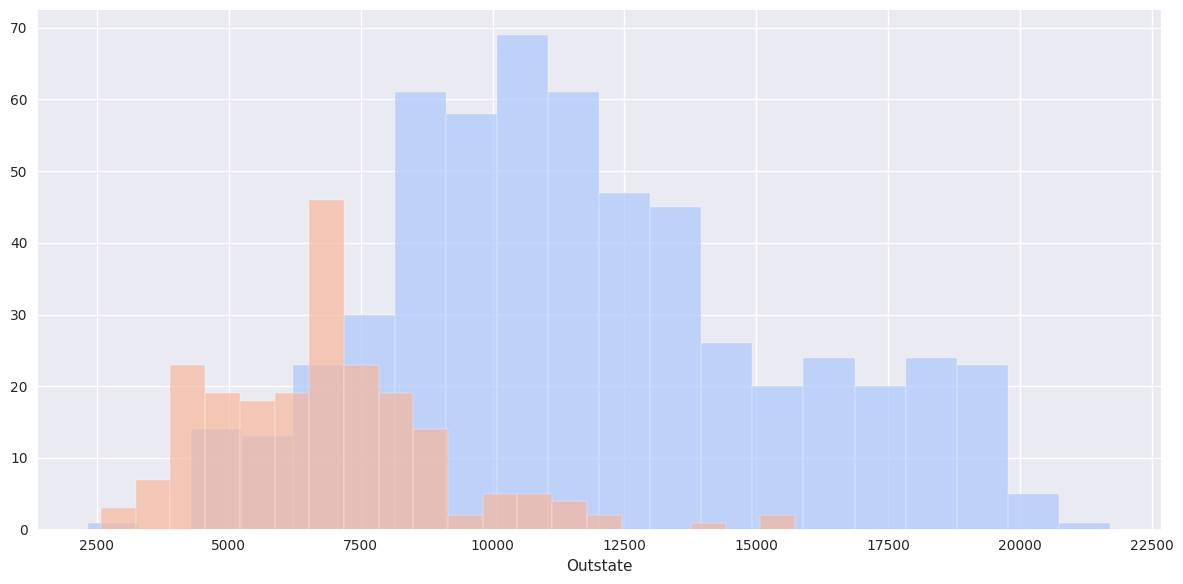

In [ ]:
# Histogram for 'Outstate' with differentiation by 'Private'
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue="Private", palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

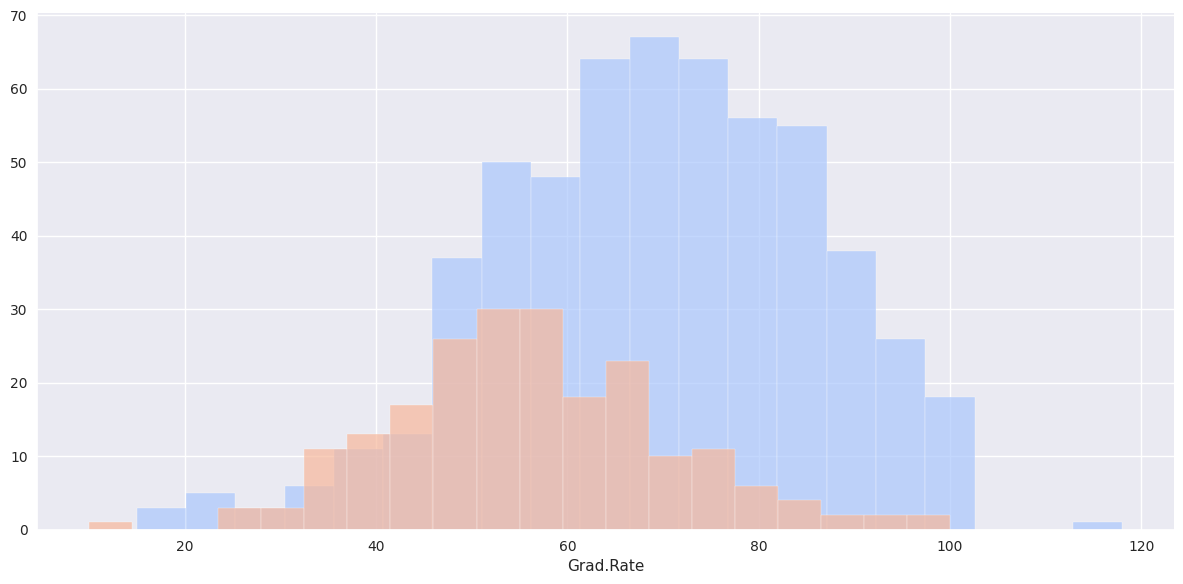

In [ ]:
# Histogram for 'Grad.Rate' with differentiation by 'Private'
sns.set_style('darkgrid')
g = sns.FacetGrid(df, hue="Private", palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

In [ ]:
# Data Cleaning and Preparation
# Handling 'Grad.Rate' values greater than 100
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [ ]:
df['Grad.Rate']['Cazenovia College'] = 100

<ipython-input-9-bc95ac68ab2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College'] = 100


In [ ]:
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


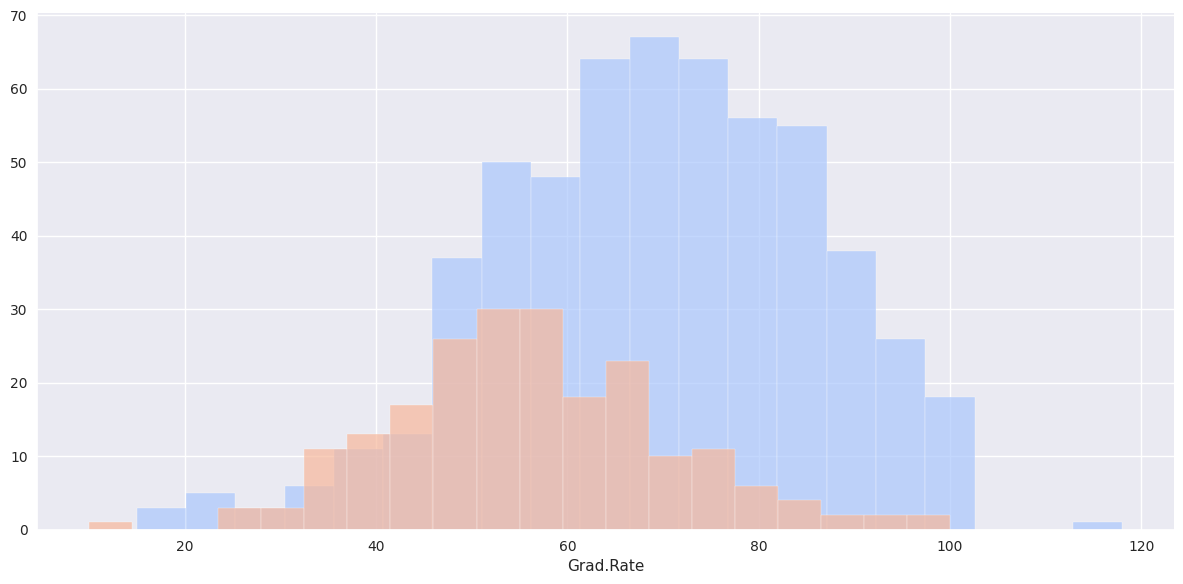

In [ ]:
sns.set_style('darkgrid')  # Setting the style for the plot

# Creating a FacetGrid plot with differentiation by 'Private' and using a coolwarm color palette
g = sns.FacetGrid(df, hue="Private", palette='coolwarm', height=6, aspect=2)

# Mapping a histogram onto the FacetGrid for the 'Grad.Rate' column with 20 bins and partial transparency (alpha=0.7)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

In [ ]:
# Converting 'Private' column to numerical values (1 for 'Yes' and 0 for 'No')
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [ ]:
df['Cluster'] = df['Private'].apply(converter)

In [ ]:
# Exclude non-numeric columns or encode them
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()

# Drop non-numeric columns (you can also encode them if they are categorical)
X = df.drop(non_numeric_cols + ['Cluster'], axis=1)
y = df['Cluster']

# Encode non-numeric target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Model Prediction and Evaluation
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8589743589743589
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.78        47
           1       0.93      0.86      0.90       109

    accuracy                           0.86       156
   macro avg       0.83      0.86      0.84       156
weighted avg       0.87      0.86      0.86       156



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

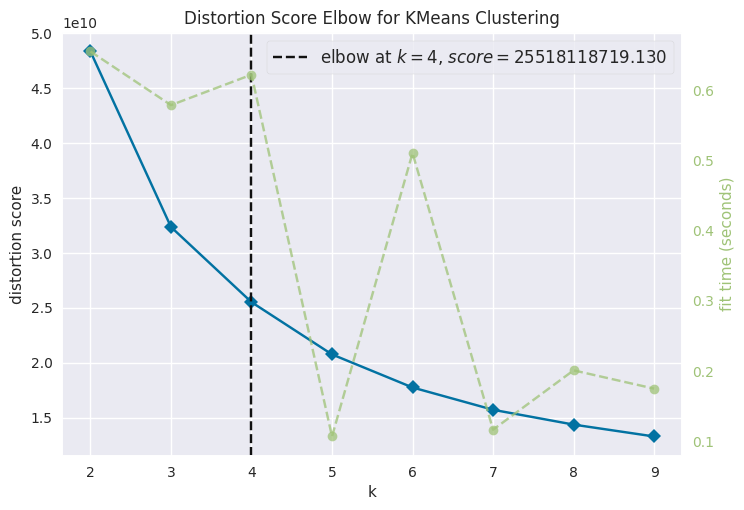

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Create KMeans instance
model = KMeans()

# Using the elbow method to find the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(2,10))  # Trying clusters from 2 to 10
visualizer.fit(X)  # Fit the data to the visualizer
visualizer.show()  # Display the Elbow plot

In [ ]:
# Creating a KMeans model with, for instance, 4 clusters
kmeans = KMeans(n_clusters=4)  # Considering 4 clusters, as previously used for 'Private'

# Fit KMeans to the feature set
kmeans.fit(X)

# Retrieving the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Displaying the cluster labels
print("Cluster Labels:", cluster_labels)

Cluster Labels: [2 0 2 0 2 0 0 0 0 2 0 0 2 0 2 2 0 2 2 2 3 1 2 1 0 2 2 1 2 0 2 0 2 2 2 2 0
 0 2 1 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 1 0 1 0 2 0 2 2 2 2 1 3 0 0 2
 0 2 2 0 1 1 2 2 2 2 0 2 0 3 2 2 2 0 2 2 0 2 0 2 2 2 0 2 2 2 2 2 0 0 0 2 2
 2 2 2 0 0 2 0 1 2 0 2 0 0 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 0 0 1 2 2 3 2 2 2
 2 0 0 0 0 2 2 2 2 2 3 0 2 2 0 0 0 2 2 2 2 2 2 0 0 2 3 0 1 2 2 2 2 2 2 2 0
 0 0 2 2 2 2 3 2 2 2 2 0 2 2 2 0 2 2 1 2 0 2 2 2 2 2 2 2 0 2 2 2 2 1 0 2 0
 1 2 2 0 2 0 2 2 0 2 2 2 2 2 2 0 2 0 0 2 0 0 0 2 2 2 2 0 3 0 2 2 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 0 1 0 2 2 2 1 2 2 1 0 1 2 2 2 2 3 2 2 0 1 2 2 2 0 2 2 2
 0 2 0 0 2 0 2 2 2 2 0 2 0 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 1 2 0 0 2 0 0 0 2
 2 0 2 2 2 0 0 2 2 0 2 0 2 0 2 0 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2
 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 2 2 2
 3 2 2 2 2 1 2 2 2 0 2 1 1 1 2 2 2 3 0 2 2 0 0 2 0 1 0 2 2 1 0 2 2 2 0 2 0
 2 1 0 2 2 2 2 2 2 0 2 2 0 2 2 3 0 1 2 2 2 2 2 0 0 0 0 0 0 0 0 2 0 2 2 2 0
 2 2 1 2 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


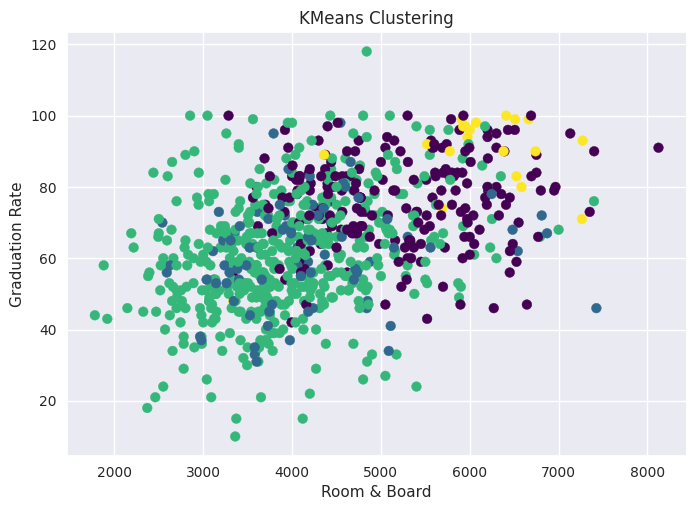

In [ ]:
# Perform KMeans clustering (previous code)

# Visualize clustering results
plt.scatter(X['Room.Board'], X['Grad.Rate'], c=cluster_labels, cmap='viridis')  # Plotting Room.Board vs Grad.Rate
plt.title('KMeans Clustering')
plt.xlabel('Room & Board')
plt.ylabel('Graduation Rate')
plt.show()

In [ ]:
# Set the number of clusters (you can use the optimal number obtained from the Elbow method)
num_clusters = 4  # Change this to the desired number of clusters

# Initialize KMeans model with the specified number of clusters
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit (train) the KMeans model on the data
kmeans_model.fit(X)

# Get cluster labels and centroids
cluster_labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

# Display cluster labels and centroids
print("Cluster Labels:", cluster_labels)
print("Centroids:\n", centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels: [3 2 3 2 3 2 2 2 2 3 2 2 3 2 3 3 2 3 3 3 1 0 3 0 2 3 3 0 3 2 3 2 3 3 3 3 2
 2 3 0 2 3 3 3 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 0 2 0 2 3 2 3 3 3 3 0 1 2 2 3
 2 3 3 2 0 0 3 3 3 3 2 3 2 1 3 3 3 2 3 3 2 3 2 3 3 3 2 3 3 3 3 3 2 2 2 3 3
 3 3 3 2 2 3 2 0 3 2 3 2 2 3 3 3 2 2 3 3 3 3 3 3 3 3 2 3 2 2 0 3 3 1 3 3 3
 3 2 2 2 2 3 3 3 3 3 1 2 3 3 2 2 2 3 3 3 3 3 3 2 2 3 1 2 0 3 3 3 3 3 3 3 2
 2 2 3 3 3 3 1 3 3 3 3 2 3 3 3 2 3 3 0 3 2 3 3 3 3 3 3 3 2 3 3 3 3 0 2 3 2
 0 3 3 2 3 2 3 3 2 3 3 3 3 3 3 2 3 2 2 3 2 2 2 3 3 3 3 2 1 2 3 3 2 2 2 2 2
 2 3 3 3 3 3 3 3 3 2 0 2 3 3 3 0 3 3 0 2 0 3 3 3 3 1 3 3 2 0 3 3 3 2 3 3 3
 2 3 2 2 3 2 3 3 3 3 2 3 2 2 3 3 3 2 3 3 3 3 2 3 3 3 3 3 0 3 2 2 3 2 2 2 3
 3 2 3 3 3 2 2 3 3 2 3 3 3 2 3 2 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3
 3 3 2 3 3 3 3 3 3 2 2 3 3 3 3 3 2 3 3 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 3 3 3
 1 3 3 3 3 0 3 3 3 2 3 0 0 0 3 3 3 1 2 3 3 2 2 3 2 0 2 3 3 0 3 3 3 3 2 3 2
 3 0 2 3 3 3 3 3 3 2 3 3 2 3 3 1 2 0 3 3 3 3 3 2 2 2 2 2 2 2 2 3 2 3 3 3 2
 3 3 0 3 